In [13]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical
import numpy as np

mnist = fetch_openml('mnist_784', version =1)

In [15]:
mnist.data = np.array(mnist.data)

In [19]:
mnist.target = np.array(mnist.target)

In [22]:
X =(mnist.data/255).reshape(len(mnist.data),28,28,1)
y= to_categorical(mnist.target.astype(np.int), 10)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

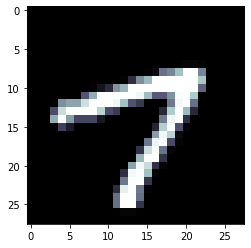

In [25]:
import matplotlib.pyplot as plt

#층까지는 필요없음
p = mnist.data[101].reshape(28,28)

plt.imshow(p, cmap='bone')

In [28]:
from keras.models import Sequential
from keras.layers import Dense,Flatten,Dropout
from keras.layers.convolutional import Conv2D, MaxPooling2D

model = Sequential()
# 합성곱을 한 뒤에 pooing을 꼭 해야할 필요는 없음
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), padding='same',
                activation='relu', input_shape=(28,28,1)))
# 두번째 층이므로 input_shape 필요없음
model.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1),
                padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), padding='same',
                activation='relu'))
model.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1),
                padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Flatten())
model.add(Dense(units=128, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(units=10, activation='softmax'))

In [29]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        320       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 14, 14, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 3136)              0

In [32]:
model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=2)

Epoch 1/10
490/490 - 138s - loss: 0.1892 - accuracy: 0.9414
Epoch 2/10
490/490 - 117s - loss: 0.0505 - accuracy: 0.9847
Epoch 3/10
490/490 - 121s - loss: 0.0356 - accuracy: 0.9888
Epoch 4/10
490/490 - 122s - loss: 0.0256 - accuracy: 0.9920
Epoch 5/10
490/490 - 121s - loss: 0.0202 - accuracy: 0.9934
Epoch 6/10
490/490 - 123s - loss: 0.0180 - accuracy: 0.9942
Epoch 7/10
490/490 - 125s - loss: 0.0146 - accuracy: 0.9949
Epoch 8/10
490/490 - 120s - loss: 0.0131 - accuracy: 0.9956
Epoch 9/10
490/490 - 123s - loss: 0.0115 - accuracy: 0.9963
Epoch 10/10
490/490 - 119s - loss: 0.0110 - accuracy: 0.9961


In [33]:
hist = model.fit(X_train, y_train, epochs=10, batch_size=100, verbose=0)

In [42]:
hist.history['accuracy'], hist.history['loss']

([0.9963469505310059,
  0.9970816373825073,
  0.9972652792930603,
  0.9977551102638245,
  0.9978979825973511,
  0.9982244968414307,
  0.9973673224449158,
  0.997836709022522,
  0.9980204105377197,
  0.9984897971153259],
 [0.010541919618844986,
  0.00823599100112915,
  0.008312804624438286,
  0.006423098035156727,
  0.006897368002682924,
  0.00504640955477953,
  0.007532275747507811,
  0.006811159662902355,
  0.006201724521815777,
  0.004187038633972406])

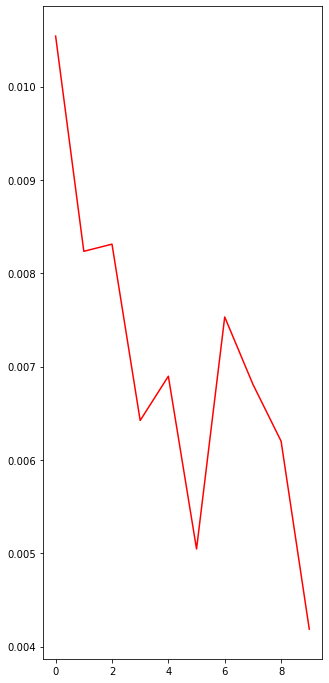

In [47]:
plt.figure(figsize=(5,12))
plt.plot(hist.history['loss'],c='red')
plt.show()

In [38]:
loss, acc =model.evaluate(X_test, y_test)

657/657 [==============================] - 14s 19ms/step - loss: 0.0377 - accuracy: 0.9935


In [39]:
print('정확도: ', round(acc,3))
print('손실값: ', round(loss,3))

정확도:  0.994
손실값:  0.038


In [45]:
y_pred = model.predict(X_test)